In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/rl_robust_owc')

In [2]:
%matplotlib notebook
import numpy as np
import time
import pickle
import os
import matplotlib.pyplot as plt
from copy import deepcopy

import gym
from stable_baselines3.ppo import PPO, MlpPolicy
from stable_baselines3.common.vec_env import SubprocVecEnv, DummyVecEnv
from stable_baselines3.common.callbacks import CallbackList
from utils.custom_eval_callback import CustomEvalCallback
from utils.env_wrappers import StateCoarse, BufferWrapper
from typing import Callable
from utils.plot_functions import plot_learning

from model.ressim import Grid
from ressim_env import ResSimEnv_v0, ResSimEnv_v1

/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ad181/anaconda3/lib/python3.7/site-packages/tensorboard/co

In [3]:
seed=1
case='case_1_full_state'

In [4]:
os.makedirs('./data', exist_ok=True)
os.makedirs('./data/'+case, exist_ok=True)

In [5]:
with open('../envs_params/env_data/env_train.pkl', 'rb') as input:
    env_train = pickle.load(input)
    
with open('../envs_params/env_data/env_eval.pkl', 'rb') as input:
    env_eval = pickle.load(input)

In [6]:
def make_env(env, rank: int, seed: int) -> Callable:
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :return: (Callable)
    """
    def _init() -> gym.Env:
        env_ = env
        env_.seed(seed + rank)
        return env_
    return _init

In [7]:
# # test run
# env = env_train
# base_action = np.ones(env.action_space.shape[0])

# state, done = env.reset(), False
# print(state.shape)
# while not done:
#     state, reward, done, info = env.step(base_action)
#     print(state.shape)

seed 1
Box(-100000.0, 100000.0, (3721,), float64)
seed 1: model definition ..
Using cuda device
seed 1: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f8961fc9da0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8961fc9cf8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f8961fc9da0> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8961fc9d30>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


-----------------------------
| time/              |      |
|    fps             | 101  |
|    iterations      | 1    |
|    time_elapsed    | 31   |
|    total_timesteps | 3200 |
-----------------------------
Eval num_timesteps=6400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
---------------------------------------
| eval/                   |           |
|    mean_ep_length       | 5         |
|    mean_reward          | 0.596     |
| time/                   |           |
|    fps                  | 37        |
|    iterations           | 2         |
|    time_elapsed         | 171       |
|    total_timesteps      | 6400      |
| train/                  |           |
|    approx_kl            | 0.0199498 |
|    clip_fraction        | 0.43      |
|    clip_range           | 0.1       |
|    entropy_loss         | 91.8      |
|    explained_var

-------------------------------------------
| time/                   |               |
|    fps                  | 28            |
|    iterations           | 11            |
|    time_elapsed         | 1216          |
|    total_timesteps      | 35200         |
| train/                  |               |
|    approx_kl            | -0.0022107887 |
|    clip_fraction        | 0.482         |
|    clip_range           | 0.1           |
|    entropy_loss         | 91.8          |
|    explained_variance   | 0.951         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.048         |
|    n_updates            | 200           |
|    policy_gradient_loss | -0.0387       |
|    std                  | 0.055         |
|    value_loss           | 0.00171       |
-------------------------------------------
Eval num_timesteps=38400, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=38400, episode_reward=0.65 +/- 0.00
Ep

Eval num_timesteps=64000, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=64000, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.681       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 20          |
|    time_elapsed         | 2294        |
|    total_timesteps      | 64000       |
| train/                  |             |
|    approx_kl            | 0.029084207 |
|    clip_fraction        | 0.508       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.955       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0294      |
|    n_updates            | 380         |
|    policy_gradient_loss | -0

------------------------------------------
| time/                   |              |
|    fps                  | 27           |
|    iterations           | 29           |
|    time_elapsed         | 3335         |
|    total_timesteps      | 92800        |
| train/                  |              |
|    approx_kl            | 0.0089589665 |
|    clip_fraction        | 0.514        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.966        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.043        |
|    n_updates            | 560          |
|    policy_gradient_loss | -0.0405      |
|    std                  | 0.055        |
|    value_loss           | 0.00164      |
------------------------------------------
Eval num_timesteps=96000, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=96000, episode_reward=0.69 +/- 0.00
Episode length: 5.00 

Eval num_timesteps=121600, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=121600, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.693       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 38          |
|    time_elapsed         | 4415        |
|    total_timesteps      | 121600      |
| train/                  |             |
|    approx_kl            | 0.009287339 |
|    clip_fraction        | 0.524       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.971       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0248      |
|    n_updates            | 740         |
|    policy_gradient_loss | 

------------------------------------------
| time/                   |              |
|    fps                  | 27           |
|    iterations           | 47           |
|    time_elapsed         | 5456         |
|    total_timesteps      | 150400       |
| train/                  |              |
|    approx_kl            | 0.0006766176 |
|    clip_fraction        | 0.551        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.972        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0344       |
|    n_updates            | 920          |
|    policy_gradient_loss | -0.0399      |
|    std                  | 0.055        |
|    value_loss           | 0.00137      |
------------------------------------------
Eval num_timesteps=153600, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=153600, episode_reward=0.70 +/- 0.00
Episode length: 5.0

Eval num_timesteps=179200, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.695       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 56          |
|    time_elapsed         | 6532        |
|    total_timesteps      | 179200      |
| train/                  |             |
|    approx_kl            | 0.019707456 |
|    clip_fraction        | 0.554       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.971       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0383      |
|    n_updates            | 1100        |
|    policy_gradient_loss | -0.0405     |
|    std

-----------------------------------------
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 65          |
|    time_elapsed         | 7566        |
|    total_timesteps      | 208000      |
| train/                  |             |
|    approx_kl            | 0.021703146 |
|    clip_fraction        | 0.571       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.97        |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0282      |
|    n_updates            | 1280        |
|    policy_gradient_loss | -0.0395     |
|    std                  | 0.055       |
|    value_loss           | 0.00129     |
-----------------------------------------
Eval num_timesteps=211200, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=211200, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
--------

Eval num_timesteps=236800, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=236800, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.695       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 74          |
|    time_elapsed         | 8639        |
|    total_timesteps      | 236800      |
| train/                  |             |
|    approx_kl            | 0.013598433 |
|    clip_fraction        | 0.555       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.978       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0485      |
|    n_updates            | 1460        |
|    policy_gradient_loss | -0.0384     |
|    std

-----------------------------------------
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 83          |
|    time_elapsed         | 9679        |
|    total_timesteps      | 265600      |
| train/                  |             |
|    approx_kl            | 0.026841845 |
|    clip_fraction        | 0.576       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.977       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0287      |
|    n_updates            | 1640        |
|    policy_gradient_loss | -0.0388     |
|    std                  | 0.055       |
|    value_loss           | 0.00106     |
-----------------------------------------
Eval num_timesteps=268800, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=268800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------

Eval num_timesteps=294400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=294400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.695       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 92          |
|    time_elapsed         | 10747       |
|    total_timesteps      | 294400      |
| train/                  |             |
|    approx_kl            | 0.057061024 |
|    clip_fraction        | 0.58        |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.971       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0452      |
|    n_updates            | 1820        |
|    policy_gradient_loss | -0.0371     |
|    std

<IPython.core.display.Javascript object>


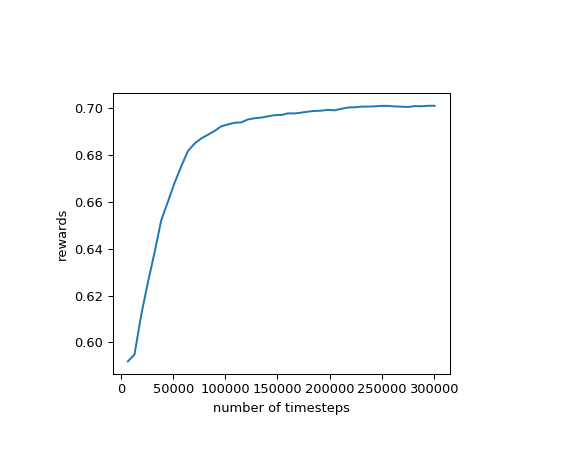

<IPython.core.display.Javascript object>


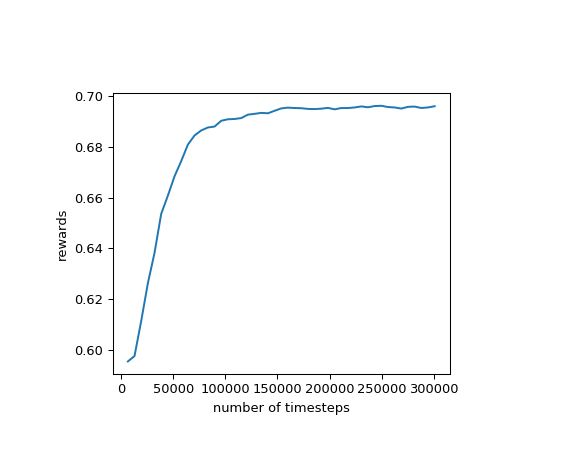

seed 2
Box(-100000.0, 100000.0, (3721,), float64)
seed 2: model definition ..
Using cuda device
seed 2: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f894bff2a90> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f894bfe24e0>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f894bff2a90> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f894bfe29e8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


-----------------------------------------
| time/                   |             |
|    fps                  | 101         |
|    iterations           | 1           |
|    time_elapsed         | 31          |
|    total_timesteps      | 3200        |
| train/                  |             |
|    approx_kl            | 0.022189742 |
|    clip_fraction        | 0.582       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.98        |
|    learning_rate        | 1e-06       |
|    loss                 | 0.058       |
|    n_updates            | 1880        |
|    policy_gradient_loss | -0.039      |
|    std                  | 0.055       |
|    value_loss           | 0.00112     |
-----------------------------------------
Eval num_timesteps=6400, episode_reward=0.61 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.60 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mea

Eval num_timesteps=32000, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=32000, episode_reward=0.65 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.645       |
| time/                   |             |
|    fps                  | 28          |
|    iterations           | 10          |
|    time_elapsed         | 1104        |
|    total_timesteps      | 32000       |
| train/                  |             |
|    approx_kl            | 0.009880925 |
|    clip_fraction        | 0.471       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.951       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0334      |
|    n_updates            | 180         |
|    policy_gradient_loss | -0

------------------------------------------
| time/                   |              |
|    fps                  | 28           |
|    iterations           | 19           |
|    time_elapsed         | 2139         |
|    total_timesteps      | 60800        |
| train/                  |              |
|    approx_kl            | -0.016659407 |
|    clip_fraction        | 0.477        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.96         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0405       |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.0365      |
|    std                  | 0.055        |
|    value_loss           | 0.00144      |
------------------------------------------
Eval num_timesteps=64000, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=64000, episode_reward=0.67 +/- 0.00
Episode length: 5.00 

Eval num_timesteps=89600, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=89600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.679       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 28          |
|    time_elapsed         | 3212        |
|    total_timesteps      | 89600       |
| train/                  |             |
|    approx_kl            | 0.015998228 |
|    clip_fraction        | 0.518       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.966       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0314      |
|    n_updates            | 540         |
|    policy_gradient_loss | -0

-----------------------------------------
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 37          |
|    time_elapsed         | 4250        |
|    total_timesteps      | 118400      |
| train/                  |             |
|    approx_kl            | 0.012961661 |
|    clip_fraction        | 0.532       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.967       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0715      |
|    n_updates            | 720         |
|    policy_gradient_loss | -0.0412     |
|    std                  | 0.055       |
|    value_loss           | 0.00156     |
-----------------------------------------
Eval num_timesteps=121600, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=121600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best

Eval num_timesteps=147200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=147200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 5             |
|    mean_reward          | 0.688         |
| time/                   |               |
|    fps                  | 27            |
|    iterations           | 46            |
|    time_elapsed         | 5323          |
|    total_timesteps      | 147200        |
| train/                  |               |
|    approx_kl            | -0.0013208651 |
|    clip_fraction        | 0.539         |
|    clip_range           | 0.1           |
|    entropy_loss         | 91.8          |
|    explained_variance   | 0.967         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0403        |
|    n_updates            | 900     

-------------------------------------------
| time/                   |               |
|    fps                  | 27            |
|    iterations           | 55            |
|    time_elapsed         | 6353          |
|    total_timesteps      | 176000        |
| train/                  |               |
|    approx_kl            | -0.0063125286 |
|    clip_fraction        | 0.538         |
|    clip_range           | 0.1           |
|    entropy_loss         | 91.8          |
|    explained_variance   | 0.97          |
|    learning_rate        | 1e-06         |
|    loss                 | 0.028         |
|    n_updates            | 1080          |
|    policy_gradient_loss | -0.0386       |
|    std                  | 0.055         |
|    value_loss           | 0.00134       |
-------------------------------------------
Eval num_timesteps=179200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=179200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +

Eval num_timesteps=204800, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=204800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.688      |
| time/                   |            |
|    fps                  | 27         |
|    iterations           | 64         |
|    time_elapsed         | 7426       |
|    total_timesteps      | 204800     |
| train/                  |            |
|    approx_kl            | 0.01013731 |
|    clip_fraction        | 0.561      |
|    clip_range           | 0.1        |
|    entropy_loss         | 91.8       |
|    explained_variance   | 0.975      |
|    learning_rate        | 1e-06      |
|    loss                 | 0.0667     |
|    n_updates            | 1260       |
|    policy_gradient_loss | -0.0393    |
|    std                  |

------------------------------------------
| time/                   |              |
|    fps                  | 27           |
|    iterations           | 73           |
|    time_elapsed         | 8460         |
|    total_timesteps      | 233600       |
| train/                  |              |
|    approx_kl            | 0.0064156987 |
|    clip_fraction        | 0.565        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.978        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0271       |
|    n_updates            | 1440         |
|    policy_gradient_loss | -0.0394      |
|    std                  | 0.055        |
|    value_loss           | 0.00113      |
------------------------------------------
Eval num_timesteps=236800, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=236800, episode_reward=0.69 +/- 0.00
Episode length: 5.0

Eval num_timesteps=262400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=262400, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
--------------------------------------------
| eval/                   |                |
|    mean_ep_length       | 5              |
|    mean_reward          | 0.692          |
| time/                   |                |
|    fps                  | 27             |
|    iterations           | 82             |
|    time_elapsed         | 9538           |
|    total_timesteps      | 262400         |
| train/                  |                |
|    approx_kl            | -0.00012390852 |
|    clip_fraction        | 0.565          |
|    clip_range           | 0.1            |
|    entropy_loss         | 91.8           |
|    explained_variance   | 0.977          |
|    learning_rate        | 1e-06          |
|    loss                 | 0.0334         |
|    n_updates            | 1620         

-----------------------------------------
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 91          |
|    time_elapsed         | 10572       |
|    total_timesteps      | 291200      |
| train/                  |             |
|    approx_kl            | 0.048255224 |
|    clip_fraction        | 0.6         |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.973       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0538      |
|    n_updates            | 1800        |
|    policy_gradient_loss | -0.0397     |
|    std                  | 0.055       |
|    value_loss           | 0.00102     |
-----------------------------------------
Eval num_timesteps=294400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
Eval num_timesteps=294400, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
------------------------------

<IPython.core.display.Javascript object>


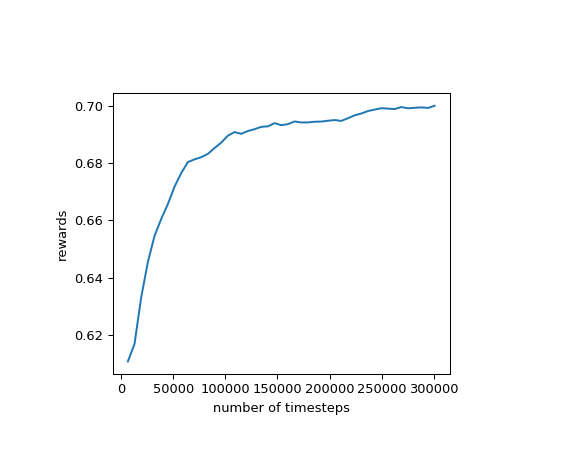

<IPython.core.display.Javascript object>


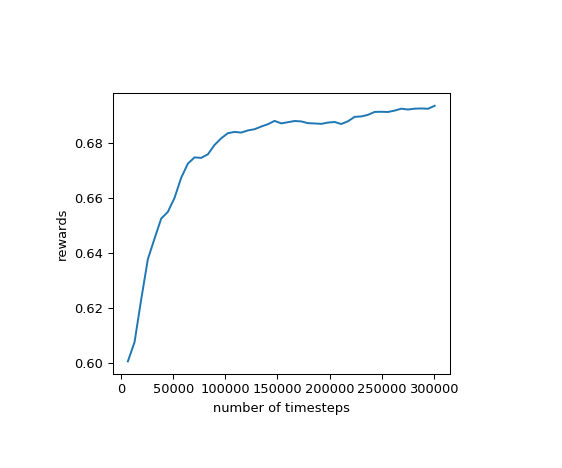

seed 3
Box(-100000.0, 100000.0, (3721,), float64)
seed 3: model definition ..
Using cuda device
seed 3: learning ..


/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f8948f10d68> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8948f105f8>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")
/data/ad181/RemoteDir/Paper_1_codes_revised/utils/custom_eval_callback.py:97: UserWarning: Training and eval env are not of the same type<stable_baselines3.common.vec_env.subproc_vec_env.SubprocVecEnv object at 0x7f8948f10d68> != <stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv object at 0x7f8948f10b00>
  warnings.warn("Training and eval env are not of the same type" f"{self.training_env} != {self.eval_env}")


-----------------------------------------
| time/                   |             |
|    fps                  | 100         |
|    iterations           | 1           |
|    time_elapsed         | 31          |
|    total_timesteps      | 3200        |
| train/                  |             |
|    approx_kl            | 0.026069384 |
|    clip_fraction        | 0.575       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.979       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0432      |
|    n_updates            | 1880        |
|    policy_gradient_loss | -0.0379     |
|    std                  | 0.055       |
|    value_loss           | 0.00105     |
-----------------------------------------
Eval num_timesteps=6400, episode_reward=0.59 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=6400, episode_reward=0.58 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mea

Eval num_timesteps=32000, episode_reward=0.64 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=32000, episode_reward=0.63 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-------------------------------------------
| eval/                   |               |
|    mean_ep_length       | 5             |
|    mean_reward          | 0.633         |
| time/                   |               |
|    fps                  | 29            |
|    iterations           | 10            |
|    time_elapsed         | 1102          |
|    total_timesteps      | 32000         |
| train/                  |               |
|    approx_kl            | -0.0011494685 |
|    clip_fraction        | 0.462         |
|    clip_range           | 0.1           |
|    entropy_loss         | 91.8          |
|    explained_variance   | 0.951         |
|    learning_rate        | 1e-06         |
|    loss                 | 0.0436        |
|    n_updates            | 180       

------------------------------------------
| time/                   |              |
|    fps                  | 28           |
|    iterations           | 19           |
|    time_elapsed         | 2139         |
|    total_timesteps      | 60800        |
| train/                  |              |
|    approx_kl            | 0.0036435581 |
|    clip_fraction        | 0.493        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.96         |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0317       |
|    n_updates            | 360          |
|    policy_gradient_loss | -0.0401      |
|    std                  | 0.055        |
|    value_loss           | 0.0017       |
------------------------------------------
Eval num_timesteps=64000, episode_reward=0.67 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=64000, episode_reward=0.67 +/- 0.00
Episode length: 5.00 

Eval num_timesteps=89600, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=89600, episode_reward=0.68 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 5          |
|    mean_reward          | 0.682      |
| time/                   |            |
|    fps                  | 27         |
|    iterations           | 28         |
|    time_elapsed         | 3205       |
|    total_timesteps      | 89600      |
| train/                  |            |
|    approx_kl            | 0.01715684 |
|    clip_fraction        | 0.512      |
|    clip_range           | 0.1        |
|    entropy_loss         | 91.8       |
|    explained_variance   | 0.964      |
|    learning_rate        | 1e-06      |
|    loss                 | 0.0478     |
|    n_updates            | 540        |
|    policy_gradient_loss | -0.0406    |
|    st

--------------------------------------------
| time/                   |                |
|    fps                  | 27             |
|    iterations           | 37             |
|    time_elapsed         | 4237           |
|    total_timesteps      | 118400         |
| train/                  |                |
|    approx_kl            | -0.00095219136 |
|    clip_fraction        | 0.531          |
|    clip_range           | 0.1            |
|    entropy_loss         | 91.8           |
|    explained_variance   | 0.968          |
|    learning_rate        | 1e-06          |
|    loss                 | 0.0268         |
|    n_updates            | 720            |
|    policy_gradient_loss | -0.0397        |
|    std                  | 0.055          |
|    value_loss           | 0.0016         |
--------------------------------------------
Eval num_timesteps=121600, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=121600, episode_re

Eval num_timesteps=147200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=147200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.688       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 46          |
|    time_elapsed         | 5315        |
|    total_timesteps      | 147200      |
| train/                  |             |
|    approx_kl            | 0.014785605 |
|    clip_fraction        | 0.549       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.968       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0352      |
|    n_updates            | 900         |
|    policy_gradient_loss | 

-----------------------------------------
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 55          |
|    time_elapsed         | 6350        |
|    total_timesteps      | 176000      |
| train/                  |             |
|    approx_kl            | 0.046116903 |
|    clip_fraction        | 0.567       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.96        |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0404      |
|    n_updates            | 1080        |
|    policy_gradient_loss | -0.0394     |
|    std                  | 0.0551      |
|    value_loss           | 0.0014      |
-----------------------------------------
Eval num_timesteps=179200, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=179200, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
--------

Eval num_timesteps=204800, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=204800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.689       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 64          |
|    time_elapsed         | 7418        |
|    total_timesteps      | 204800      |
| train/                  |             |
|    approx_kl            | 0.009705594 |
|    clip_fraction        | 0.549       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.973       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0483      |
|    n_updates            | 1260        |
|    policy_gradient_loss | 

-----------------------------------------
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 73          |
|    time_elapsed         | 8453        |
|    total_timesteps      | 233600      |
| train/                  |             |
|    approx_kl            | 0.021960678 |
|    clip_fraction        | 0.571       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.974       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.0287      |
|    n_updates            | 1440        |
|    policy_gradient_loss | -0.0403     |
|    std                  | 0.0551      |
|    value_loss           | 0.00123     |
-----------------------------------------
Eval num_timesteps=236800, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=236800, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
New best

Eval num_timesteps=262400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=262400, episode_reward=0.69 +/- 0.00
Episode length: 5.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 5           |
|    mean_reward          | 0.692       |
| time/                   |             |
|    fps                  | 27          |
|    iterations           | 82          |
|    time_elapsed         | 9522        |
|    total_timesteps      | 262400      |
| train/                  |             |
|    approx_kl            | 0.015523336 |
|    clip_fraction        | 0.567       |
|    clip_range           | 0.1         |
|    entropy_loss         | 91.8        |
|    explained_variance   | 0.977       |
|    learning_rate        | 1e-06       |
|    loss                 | 0.053       |
|    n_updates            | 1620        |
|    policy_gradient_loss | -0.0383     |
|    std

------------------------------------------
| time/                   |              |
|    fps                  | 27           |
|    iterations           | 91           |
|    time_elapsed         | 10521        |
|    total_timesteps      | 291200       |
| train/                  |              |
|    approx_kl            | -0.011444636 |
|    clip_fraction        | 0.555        |
|    clip_range           | 0.1          |
|    entropy_loss         | 91.8         |
|    explained_variance   | 0.972        |
|    learning_rate        | 1e-06        |
|    loss                 | 0.0493       |
|    n_updates            | 1800         |
|    policy_gradient_loss | -0.0351      |
|    std                  | 0.055        |
|    value_loss           | 0.00107      |
------------------------------------------
Eval num_timesteps=294400, episode_reward=0.70 +/- 0.00
Episode length: 5.00 +/- 0.00
New best mean reward!
Eval num_timesteps=294400, episode_reward=0.69 +/- 0.00
Episode length: 5.0

<IPython.core.display.Javascript object>


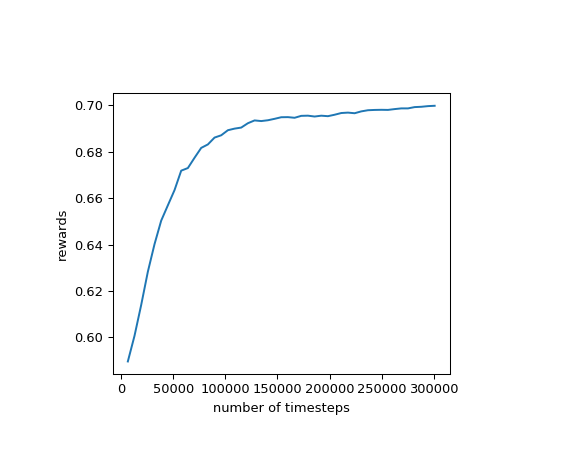

<IPython.core.display.Javascript object>


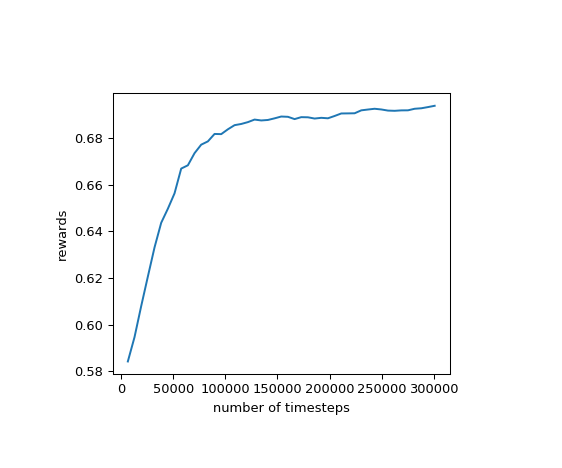

In [8]:
for seed in range(1,4):
    if True:
        print(f'seed {seed}')
        log_dir = './data/'+case+'/seed_'+str(seed)
        os.makedirs(log_dir, exist_ok=True)
        num_cpu = 64
        env_train.seed(seed)
        env_eval.seed(seed)
        train_callback = CustomEvalCallback( env_train, 
                                            best_model_save_path=None, 
                                            n_eval_episodes=1,
                                            log_path=str(log_dir)+'/results_train', 
                                            eval_freq=100)
        callback_list = [train_callback]
        eval_callback = CustomEvalCallback( env_eval, 
                                           best_model_save_path=None, 
                                           n_eval_episodes=1,
                                           log_path=str(log_dir)+'/results_eval', 
                                           eval_freq=100)
        callback_list.append(eval_callback)
        callback = CallbackList(callback_list)
        env = SubprocVecEnv([make_env(env_train, i, seed) for i in range(num_cpu)])
        print(env.observation_space)
#     env = VecMonitor(env, filename=log_dir)
        print(f'seed {seed}: model definition ..')
        model = PPO(policy=MlpPolicy,
            env=env,
            learning_rate = 1e-6,
            n_steps = 50,
            batch_size = 16,
            n_epochs = 20,
            gamma = 0.99,
            gae_lambda = 0.95,
            clip_range = 0.1,
            clip_range_vf = None,
            ent_coef = 0.001,
            vf_coef = 0.5,
            max_grad_norm = 0.5,
            use_sde= False,
            create_eval_env= False,
            policy_kwargs = dict(net_arch=[4000,2000,800,300], log_std_init=-2.9),
            verbose = 1,
            target_kl = 0.05,
            seed = seed,
            device = "auto")
        print(f'seed {seed}: learning ..')
        model.learn(total_timesteps=300000, callback=callback)
#         model.save(log_dir+'/PPO')
        del model
        fig = plot_learning(log_dir, case='train')
        fig.savefig(log_dir+'/learn_train.png')
        fig = plot_learning(log_dir, case='eval')
        fig.savefig(log_dir+'/learn_eval.png')